In [9]:
import os
from matplotlib.image import imread
path=r"D:\tezheng\IMG_20220127_102603.png"
image = imread(path)
image.shape

(768, 768, 4)

In [10]:
from sklearn.cluster import KMeans
X = image.reshape(-1, 4)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [11]:
segmented_imgs = []
n_colors = (4,2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

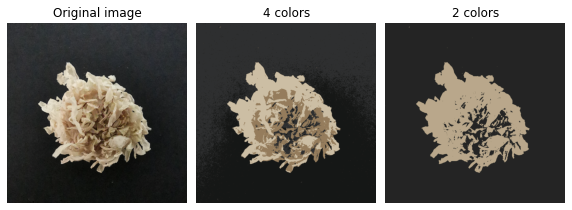

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(131)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(132 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()